In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

import pandas as pd

file_path = "../data_raw/secondary.csv"
datafile = pd.read_csv(file_path)

datafile.head()

,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
0,Afghanistan,2014,All genders,Not applicable,Number,2602734.0
1,Afghanistan,2014,Female,Not applicable,Number,901106.0
2,Afghanistan,2013,Female,Not applicable,Number,874199.0
3,Afghanistan,2013,All genders,Not applicable,Number,2538420.0
4,Afghanistan,2012,All genders,Not applicable,Number,2415884.0


In [2]:
datafile = datafile.rename(columns = {
    "Reference Area" : "Country",
    "Time Period" : "Year",
    "Sex" : "Gender",
    "Observation Value" : "Enrolments"
})

datafile.head()

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,All genders,Not applicable,Number,2602734.0
1,Afghanistan,2014,Female,Not applicable,Number,901106.0
2,Afghanistan,2013,Female,Not applicable,Number,874199.0
3,Afghanistan,2013,All genders,Not applicable,Number,2538420.0
4,Afghanistan,2012,All genders,Not applicable,Number,2415884.0


In [3]:
datafile = datafile[datafile["Units of measurement"]=="Number"]

datafile.head(100)

,Country,Year,Gender,Age group,Units of measurement,Enrolments
0,Afghanistan,2014,All genders,Not applicable,Number,2602734.0
1,Afghanistan,2014,Female,Not applicable,Number,901106.0
2,Afghanistan,2013,Female,Not applicable,Number,874199.0
3,Afghanistan,2013,All genders,Not applicable,Number,2538420.0
4,Afghanistan,2012,All genders,Not applicable,Number,2415884.0
...,...,...,...,...,...,...
95,Albania,1993,Female,Not applicable,Number,181277.0
96,Albania,1993,All genders,Not applicable,Number,362439.0
97,Albania,1992,Female,Not applicable,Number,197791.0
98,Albania,1992,All genders,Not applicable,Number,404904.0


In [4]:
datafile = datafile.drop(columns=["Age group", "Units of measurement"])

datafile.head()

,Country,Year,Gender,Enrolments
0,Afghanistan,2014,All genders,2602734.0
1,Afghanistan,2014,Female,901106.0
2,Afghanistan,2013,Female,874199.0
3,Afghanistan,2013,All genders,2538420.0
4,Afghanistan,2012,All genders,2415884.0


In [5]:
datafile.isnull().sum()

Country       0
Year          0
Gender        0
Enrolments    0
dtype: int64

In [6]:
datafile = datafile.sort_values(by = ["Country", "Year", "Gender"])

datafile.head(100)

,Country,Year,Gender,Enrolments
56,Afghanistan,1975,All genders,185723.0
55,Afghanistan,1975,Female,22281.0
54,Afghanistan,1976,All genders,204889.0
53,Afghanistan,1976,Female,26173.0
52,Afghanistan,1977,All genders,223379.0
...,...,...,...,...
90,Albania,1996,All genders,346945.0
89,Albania,1996,Female,168746.0
88,Albania,1997,All genders,350157.0
87,Albania,1997,Female,169918.0


In [7]:
datafile = datafile.reset_index(drop = True)
datafile.index = datafile.index +1 

datafile.head()

,Country,Year,Gender,Enrolments
1,Afghanistan,1975,All genders,185723.0
2,Afghanistan,1975,Female,22281.0
3,Afghanistan,1976,All genders,204889.0
4,Afghanistan,1976,Female,26173.0
5,Afghanistan,1977,All genders,223379.0


In [8]:
datafile.to_csv("../data_clean/secondary_clean.csv", index=True)

In [9]:
import os
os.path.exists("../data_clean")

True

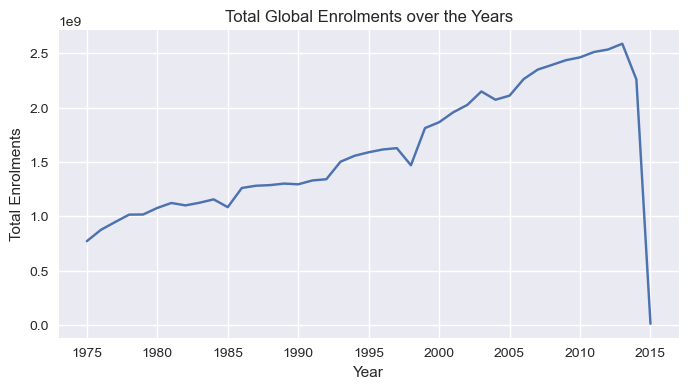

In [10]:
enrolments_years = datafile.groupby("Year")["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=enrolments_years, x = "Year", y = "Enrolments")
plt.title("Total Global Enrolments over the Years")
plt.xlabel("Year")
plt.ylabel("Total Enrolments")
plt.show()

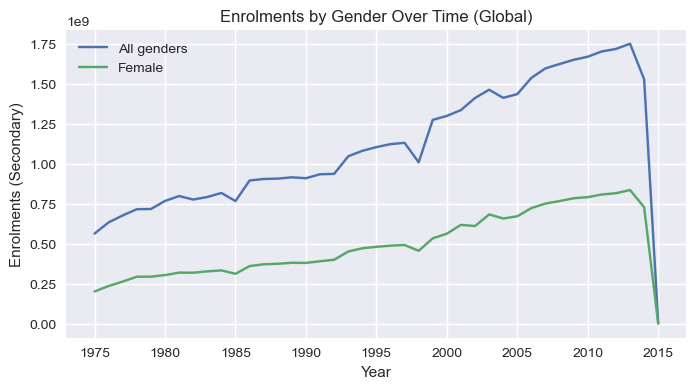

In [ ]:
gender_trend = datafile.groupby(["Year", "Gender"])["Enrolments"].sum().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(data=gender_trend, x="Year", y="Enrolments", hue="Gender")
plt.title("Enrolments by Gender Over Time (Global)")
plt.xlabel("Year")
plt.ylabel("Enrolments (Secondary)")
plt.legend()
plt.show()

In [14]:
pivot = datafile.pivot_table(
    index="Year",
    columns="Gender",
    values="Enrolments",
    aggfunc="sum"
).reset_index()

In [15]:
pivot["Male"] = pivot["All genders"] - pivot["Female"]

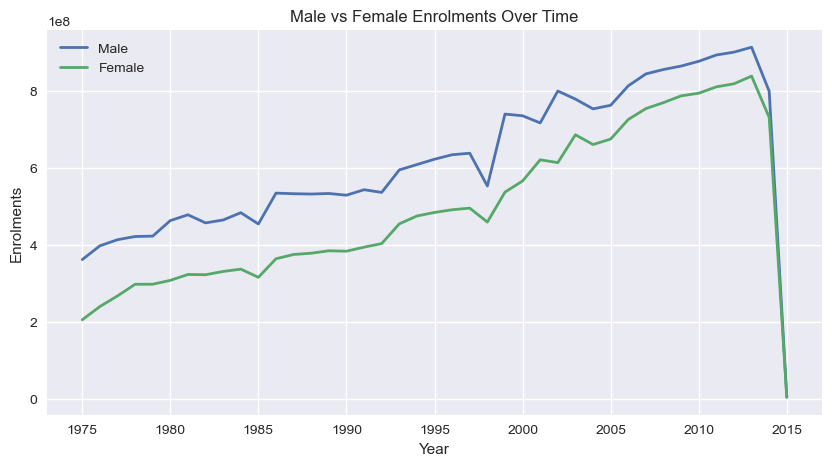

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(pivot["Year"], pivot["Male"], label="Male", linewidth=2)
plt.plot(pivot["Year"], pivot["Female"], label="Female", linewidth=2)

plt.title("Male vs Female Enrolments Over Time")
plt.xlabel("Year")
plt.ylabel("Enrolments (Secondary)")
plt.legend()
plt.grid(True)

plt.show()

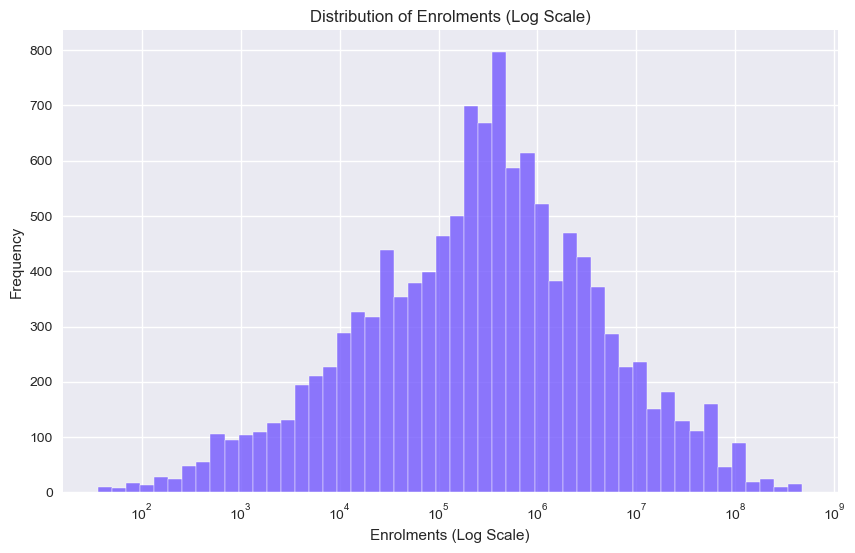

In [41]:
enrol_nonzero = datafile["Enrolments"][datafile["Enrolments"] > 0]

plt.figure(figsize=(10,6))
sns.histplot(
    enrol_nonzero,
    bins=50,
    log_scale=True,
    color="#7358FE",      
    edgecolor="white",
    alpha=0.8
)
plt.title("Distribution of Enrolments (Log Scale)")
plt.xlabel("Enrolments (Log Scale)")
plt.ylabel("Frequency")
plt.show()

In [32]:
female_data = datafile[datafile["Gender"] == "Female"]

In [33]:
female_totals = (
    female_data.groupby("Country")["Enrolments"]
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

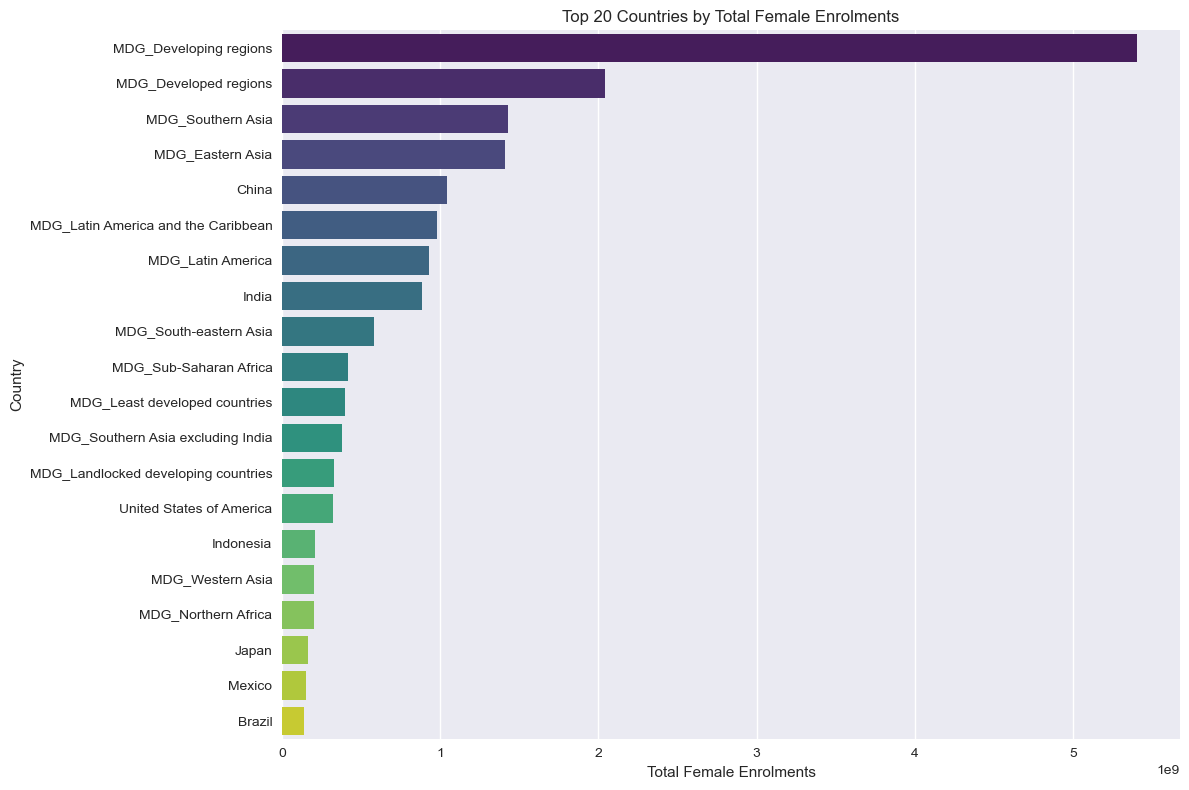

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(
    x=female_totals.values,
    y=female_totals.index,
    palette="viridis"
)

plt.title("Top 20 Countries by Total Female Enrolments")
plt.xlabel("Total Female Enrolments")
plt.ylabel("Country")



plt.tight_layout()
plt.show()